In [1]:
# Importarcion librerias
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.naive_bayes import GaussianNB

from sklearn.tree import DecisionTreeClassifier

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### **Link del dataSet e información del mismo :**
*https://www.kaggle.com/rikdifos/credit-card-approval-prediction/data*

## ***Preparar dataSet `application_record`***


In [ ]:
# Cargar dataSets Application_record & Credit_record
application= pd.read_csv('/content/drive/My Drive/9° Semestre/Colab Notebooks-UPTC/DataSets/dataSets-CreditCardApproval/application_record.csv', sep=',')
application.info()

In [5]:
# Valores nulos en dataSet application

print("Numero Filas y Columnas dataSet application = ",application.shape)
print("Valores nulos en dataSet application: \n")
print(application.isnull().sum())

Numero Filas y Columnas dataSet application =  (438557, 18)
Valores nulos en dataSet application: 

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134203
CNT_FAM_MEMBERS             0
dtype: int64


In [6]:
# Ver valores en la NULOS(NaN) clase OCCUPATION_TYPE

#print(application.OCCUPATION_TYPE.value_counts(dropna=False))
print("\nValores nulos en la columna OCCUPATION_TYPE = ",application.OCCUPATION_TYPE.isnull().sum())


Valores nulos en la columna OCCUPATION_TYPE =  134203


In [7]:
# Eliminar filas con valores nulos(NaN) en la Colummna OCCUPATION_TYPE

print("Numero Filas y Columnas dataSet application= ",application.shape)
print("----> Elimando filas con valor NaN en atributo OCCUPATION_TYPE...")
application.drop(application[application.OCCUPATION_TYPE.isnull()].index, inplace = True)
print("Nuevo numero Filas y Columnas dataSet application= ",application.shape)


Numero Filas y Columnas dataSet application=  (438557, 18)
----> Elimando filas con valor NaN en atributo OCCUPATION_TYPE...
Nuevo numero Filas y Columnas dataSet application=  (304354, 18)


## ***Preparar dataSet `credit_record`***

In [8]:
credit = pd.read_csv('/content/drive/My Drive/9° Semestre/Colab Notebooks-UPTC/DataSets/dataSets-CreditCardApproval/credit_record.csv', sep=',')
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [9]:
print("Numero Filas y Columnas dataSet credit = ",credit.shape)
# Valores nulos en dataSet application
print("Valores nulos en dataSet credit:\n")
print(credit.isnull().sum())

Numero Filas y Columnas dataSet credit =  (1048575, 3)
Valores nulos en dataSet credit:

ID                0
MONTHS_BALANCE    0
STATUS            0
dtype: int64


In [10]:
# Eliminar atributo(columna) MONTHS_BALANCE	
print("----> Eliminando atributo MONTHS_BALANCE dataSet credit...\n")
credit.drop(['MONTHS_BALANCE'],axis='columns',inplace=True)
credit.info()

----> Eliminando atributo MONTHS_BALANCE dataSet credit...

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   ID      1048575 non-null  int64 
 1   STATUS  1048575 non-null  object
dtypes: int64(1), object(1)
memory usage: 16.0+ MB


In [11]:
print("Nuevo numero Filas y Columnas dataSet credit = ",credit.shape)
# Valores nulos en dataSet application
print("Valores nulos en dataSet credit:\n")
print(credit.isnull().sum())

Nuevo numero Filas y Columnas dataSet credit =  (1048575, 2)
Valores nulos en dataSet credit:

ID        0
STATUS    0
dtype: int64


In [ ]:
# Concatenando valores de atributo(Columna) STATUS por ID
credit = credit.groupby(credit['ID']).aggregate({'STATUS':'sum'})
credit.head(n=10)

## ***Unir dataSets `application_record` y `credit_record`***

In [15]:
print("Numero Filas y Columnas dataSet application= ",application.shape)
print("Numero Filas y Columnas dataSet credit = ",credit.shape)

Numero Filas y Columnas dataSet application=  (304354, 18)
Numero Filas y Columnas dataSet credit =  (45985, 1)


In [14]:
print("----> Uniendo dataSets application Y credit por Atributo(Columna) 'ID'...\n")
dataSet = pd.merge(application, credit, on='ID')
print(dataSet.info())

----> Uniendo dataSets application Y credit por Atributo(Columna) 'ID'...

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25134 entries, 0 to 25133
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   25134 non-null  int64  
 1   CODE_GENDER          25134 non-null  object 
 2   FLAG_OWN_CAR         25134 non-null  object 
 3   FLAG_OWN_REALTY      25134 non-null  object 
 4   CNT_CHILDREN         25134 non-null  int64  
 5   AMT_INCOME_TOTAL     25134 non-null  float64
 6   NAME_INCOME_TYPE     25134 non-null  object 
 7   NAME_EDUCATION_TYPE  25134 non-null  object 
 8   NAME_FAMILY_STATUS   25134 non-null  object 
 9   NAME_HOUSING_TYPE    25134 non-null  object 
 10  DAYS_BIRTH           25134 non-null  int64  
 11  DAYS_EMPLOYED        25134 non-null  int64  
 12  FLAG_MOBIL           25134 non-null  int64  
 13  FLAG_WORK_PHONE      25134 non-null  int64  
 14  FLAG_PHONE 

In [16]:
# Validar que no existen valores nulos en el dataSet
print("Numero Filas y Columnas dataSet = ",dataSet.shape)
print("Valores nulos en dataSet: \n")
print(dataSet.isnull().sum())

Numero Filas y Columnas dataSet =  (25134, 19)
Valores nulos en dataSet: 

ID                     0
CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
DAYS_BIRTH             0
DAYS_EMPLOYED          0
FLAG_MOBIL             0
FLAG_WORK_PHONE        0
FLAG_PHONE             0
FLAG_EMAIL             0
OCCUPATION_TYPE        0
CNT_FAM_MEMBERS        0
STATUS                 0
dtype: int64


In [17]:
dataSet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25134 entries, 0 to 25133
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   25134 non-null  int64  
 1   CODE_GENDER          25134 non-null  object 
 2   FLAG_OWN_CAR         25134 non-null  object 
 3   FLAG_OWN_REALTY      25134 non-null  object 
 4   CNT_CHILDREN         25134 non-null  int64  
 5   AMT_INCOME_TOTAL     25134 non-null  float64
 6   NAME_INCOME_TYPE     25134 non-null  object 
 7   NAME_EDUCATION_TYPE  25134 non-null  object 
 8   NAME_FAMILY_STATUS   25134 non-null  object 
 9   NAME_HOUSING_TYPE    25134 non-null  object 
 10  DAYS_BIRTH           25134 non-null  int64  
 11  DAYS_EMPLOYED        25134 non-null  int64  
 12  FLAG_MOBIL           25134 non-null  int64  
 13  FLAG_WORK_PHONE      25134 non-null  int64  
 14  FLAG_PHONE           25134 non-null  int64  
 15  FLAG_EMAIL           25134 non-null 

In [18]:
"""
0: 1-29 días de atraso
1: 30-59 días de atraso
2: 60-89 días de retraso
3: 90-119 días de retraso
4: 120-149 días de retraso
5: Deudas vencidas o incobrables, cancelaciones por más de 150 días
C: pagado ese mes
X: Sin préstamo para el mes
"""
def goodClient(chain):    
  if str(chain).count('3') > 0:
    return False
  if str(chain).count('4') > 0:
    return False
  if str(chain).count('5') > 0:
    return False    
  return True

In [19]:
dataSet['goodClient'] = dataSet.STATUS
dataSet.goodClient = dataSet.STATUS.apply(goodClient)

In [20]:
dataSet

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,STATUS,goodClient
0,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,CCCCCCCX00X0X0XXXXXX0XXX0XXX0X,True
1,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,0X0XX,True
2,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,XXXXX,True
3,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,CCCCCCCCCCCCCCCX0X0X000X0XX,True
4,5008811,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,CCCCCCCCCCCCCCCCCCCCCCCCCCCX0X0X000X0XX,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25129,5149828,M,Y,Y,0,315000.0,Working,Secondary / secondary special,Married,House / apartment,-17348,-2420,1,0,0,0,Managers,2.0,555XX4XXXXXX,False
25130,5149834,F,N,Y,0,157500.0,Commercial associate,Higher education,Married,House / apartment,-12387,-1325,1,0,1,1,Medicine staff,2.0,CCCCC5555555432211111110,False
25131,5149838,F,N,Y,0,157500.0,Pensioner,Higher education,Married,House / apartment,-12387,-1325,1,0,1,1,Medicine staff,2.0,CCCCCCCCCCCCCC5555555432211111110,False
25132,5150049,F,N,Y,0,283500.0,Working,Secondary / secondary special,Married,House / apartment,-17958,-655,1,0,0,0,Sales staff,2.0,2100000000,True


### ***Matriz de Correlación***

In [21]:
# Importar la libreria necesaria
import seaborn as sns

In [22]:
# Hallar la matriz de Correlación
correlation_matrix = dataSet.corr(method= "spearman")


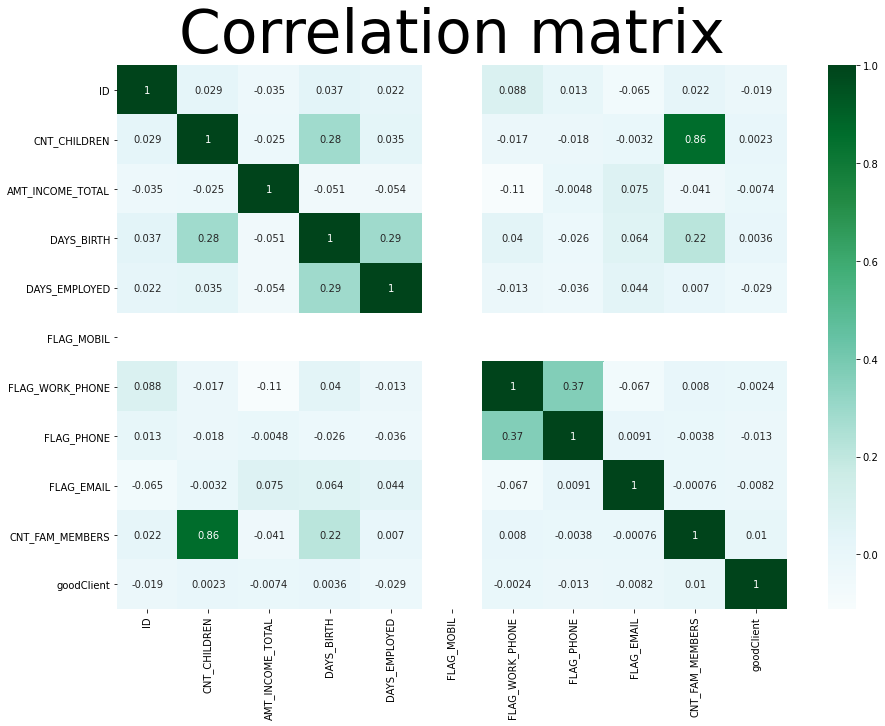

In [23]:
# Graficar la matriz
import seaborn as sns

plt.figure(figsize=(15,10)) 
sns.heatmap(correlation_matrix, annot = True,cmap='BuGn') # Link para los colores https://seaborn.pydata.org/tutorial/color_palettes.html
plt.title("Correlation matrix",fontdict= {'fontsize':60})
plt.savefig("correlation-matriz-datSet.png")
plt.show()


## **Limpieza de dataSet**

In [24]:
# Información dataSet
dataSet.info()
dataSet.head(n=5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25134 entries, 0 to 25133
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   25134 non-null  int64  
 1   CODE_GENDER          25134 non-null  object 
 2   FLAG_OWN_CAR         25134 non-null  object 
 3   FLAG_OWN_REALTY      25134 non-null  object 
 4   CNT_CHILDREN         25134 non-null  int64  
 5   AMT_INCOME_TOTAL     25134 non-null  float64
 6   NAME_INCOME_TYPE     25134 non-null  object 
 7   NAME_EDUCATION_TYPE  25134 non-null  object 
 8   NAME_FAMILY_STATUS   25134 non-null  object 
 9   NAME_HOUSING_TYPE    25134 non-null  object 
 10  DAYS_BIRTH           25134 non-null  int64  
 11  DAYS_EMPLOYED        25134 non-null  int64  
 12  FLAG_MOBIL           25134 non-null  int64  
 13  FLAG_WORK_PHONE      25134 non-null  int64  
 14  FLAG_PHONE           25134 non-null  int64  
 15  FLAG_EMAIL           25134 non-null 

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,STATUS,goodClient
0,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,CCCCCCCX00X0X0XXXXXX0XXX0XXX0X,True
1,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,0X0XX,True
2,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,XXXXX,True
3,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,CCCCCCCCCCCCCCCX0X0X000X0XX,True
4,5008811,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,CCCCCCCCCCCCCCCCCCCCCCCCCCCX0X0X000X0XX,True


In [25]:
# Eliminación de atributos
dataSet = dataSet.drop(['ID'],axis=1)
dataSet = dataSet.drop(['DAYS_BIRTH'],axis=1)
dataSet = dataSet.drop(['FLAG_MOBIL'],axis=1)
dataSet = dataSet.drop(['FLAG_WORK_PHONE'],axis=1)
dataSet = dataSet.drop(['FLAG_PHONE'],axis=1)
dataSet = dataSet.drop(['FLAG_EMAIL'],axis=1)

In [26]:
# Información dataSet despues de eliminar atributos 
dataSet.info()
dataSet.head(n=5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25134 entries, 0 to 25133
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CODE_GENDER          25134 non-null  object 
 1   FLAG_OWN_CAR         25134 non-null  object 
 2   FLAG_OWN_REALTY      25134 non-null  object 
 3   CNT_CHILDREN         25134 non-null  int64  
 4   AMT_INCOME_TOTAL     25134 non-null  float64
 5   NAME_INCOME_TYPE     25134 non-null  object 
 6   NAME_EDUCATION_TYPE  25134 non-null  object 
 7   NAME_FAMILY_STATUS   25134 non-null  object 
 8   NAME_HOUSING_TYPE    25134 non-null  object 
 9   DAYS_EMPLOYED        25134 non-null  int64  
 10  OCCUPATION_TYPE      25134 non-null  object 
 11  CNT_FAM_MEMBERS      25134 non-null  float64
 12  STATUS               25134 non-null  object 
 13  goodClient           25134 non-null  bool   
dtypes: bool(1), float64(2), int64(2), object(9)
memory usage: 2.7+ MB


,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_EMPLOYED,OCCUPATION_TYPE,CNT_FAM_MEMBERS,STATUS,goodClient
0,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-1134,Security staff,2.0,CCCCCCCX00X0X0XXXXXX0XXX0XXX0X,True
1,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-3051,Sales staff,1.0,0X0XX,True
2,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-3051,Sales staff,1.0,XXXXX,True
3,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-3051,Sales staff,1.0,CCCCCCCCCCCCCCCX0X0X000X0XX,True
4,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-3051,Sales staff,1.0,CCCCCCCCCCCCCCCCCCCCCCCCCCCX0X0X000X0XX,True


### Cambiar atributos de *`Cualitativos Nominales`* A *`Cuantitativos Discretos`*

In [27]:
# Cambio tipo de variables de Object a string
dataSet.CODE_GENDER = dataSet.CODE_GENDER.astype(str)
dataSet.FLAG_OWN_CAR = dataSet.FLAG_OWN_CAR.astype(str)
dataSet.FLAG_OWN_REALTY = dataSet.FLAG_OWN_REALTY.astype(str)

In [ ]:
# Cambia valores de CODE_GENDER
# M = 0
# F = 1
dataSet.CODE_GENDER = dataSet.CODE_GENDER.replace({'M':0,'F':1})
dataSet.head(n=3)

In [ ]:
# Cambia valores de FLAG_OWN_CAR
# N = 0
# Y = 1
dataSet.FLAG_OWN_CAR = dataSet.FLAG_OWN_CAR.replace({'N':0,'Y':1})
dataSet.head(n=3)

In [ ]:
# Cambia valores de FLAG_OWN_REALTY
# N = 0
# Y = 1
dataSet.FLAG_OWN_REALTY = dataSet.FLAG_OWN_REALTY.replace({'N':0,'Y':1})
dataSet.head(n=3)

In [31]:
# Información dataSet 
dataSet.info()
dataSet.head(n=5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25134 entries, 0 to 25133
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CODE_GENDER          25134 non-null  int64  
 1   FLAG_OWN_CAR         25134 non-null  int64  
 2   FLAG_OWN_REALTY      25134 non-null  int64  
 3   CNT_CHILDREN         25134 non-null  int64  
 4   AMT_INCOME_TOTAL     25134 non-null  float64
 5   NAME_INCOME_TYPE     25134 non-null  object 
 6   NAME_EDUCATION_TYPE  25134 non-null  object 
 7   NAME_FAMILY_STATUS   25134 non-null  object 
 8   NAME_HOUSING_TYPE    25134 non-null  object 
 9   DAYS_EMPLOYED        25134 non-null  int64  
 10  OCCUPATION_TYPE      25134 non-null  object 
 11  CNT_FAM_MEMBERS      25134 non-null  float64
 12  STATUS               25134 non-null  object 
 13  goodClient           25134 non-null  bool   
dtypes: bool(1), float64(2), int64(5), object(6)
memory usage: 2.7+ MB


,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_EMPLOYED,OCCUPATION_TYPE,CNT_FAM_MEMBERS,STATUS,goodClient
0,0,1,1,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-1134,Security staff,2.0,CCCCCCCX00X0X0XXXXXX0XXX0XXX0X,True
1,1,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-3051,Sales staff,1.0,0X0XX,True
2,1,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-3051,Sales staff,1.0,XXXXX,True
3,1,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-3051,Sales staff,1.0,CCCCCCCCCCCCCCCX0X0X000X0XX,True
4,1,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-3051,Sales staff,1.0,CCCCCCCCCCCCCCCCCCCCCCCCCCCX0X0X000X0XX,True


In [32]:
# Valores de la clase NAME_INCOME_TYPE
dataSet.NAME_INCOME_TYPE.value_counts()
"""
Working                 0
Commercial associate    1
State servant           2
Pensioner               3
Student                 4
"""
dictionary_replacement = {'Working':0,
                          'Commercial associate':1,
                          'State servant':2,
                          'Pensioner':3,
                          'Student':4}
dataSet.NAME_INCOME_TYPE = dataSet.NAME_INCOME_TYPE.map(dictionary_replacement)
dataSet.head(n=5)

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_EMPLOYED,OCCUPATION_TYPE,CNT_FAM_MEMBERS,STATUS,goodClient
0,0,1,1,0,112500.0,0,Secondary / secondary special,Married,House / apartment,-1134,Security staff,2.0,CCCCCCCX00X0X0XXXXXX0XXX0XXX0X,True
1,1,0,1,0,270000.0,1,Secondary / secondary special,Single / not married,House / apartment,-3051,Sales staff,1.0,0X0XX,True
2,1,0,1,0,270000.0,1,Secondary / secondary special,Single / not married,House / apartment,-3051,Sales staff,1.0,XXXXX,True
3,1,0,1,0,270000.0,1,Secondary / secondary special,Single / not married,House / apartment,-3051,Sales staff,1.0,CCCCCCCCCCCCCCCX0X0X000X0XX,True
4,1,0,1,0,270000.0,1,Secondary / secondary special,Single / not married,House / apartment,-3051,Sales staff,1.0,CCCCCCCCCCCCCCCCCCCCCCCCCCCX0X0X000X0XX,True


In [33]:
# Valores de la clase NAME_EDUCATION_TYPE
dataSet.NAME_EDUCATION_TYPE.value_counts()
"""
Secondary / secondary special    0
Higher education                 1
Incomplete higher                2
Lower secondary                  3
Academic degree                  4
"""
dictionary_replacement = {'Secondary / secondary special':0,
                          'Higher education':1,
                          'Incomplete higher':2,
                          'Lower secondary':3,
                          'Academic degree':4}
dataSet.NAME_EDUCATION_TYPE = dataSet.NAME_EDUCATION_TYPE.map(dictionary_replacement)
dataSet.head(n=5)

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_EMPLOYED,OCCUPATION_TYPE,CNT_FAM_MEMBERS,STATUS,goodClient
0,0,1,1,0,112500.0,0,0,Married,House / apartment,-1134,Security staff,2.0,CCCCCCCX00X0X0XXXXXX0XXX0XXX0X,True
1,1,0,1,0,270000.0,1,0,Single / not married,House / apartment,-3051,Sales staff,1.0,0X0XX,True
2,1,0,1,0,270000.0,1,0,Single / not married,House / apartment,-3051,Sales staff,1.0,XXXXX,True
3,1,0,1,0,270000.0,1,0,Single / not married,House / apartment,-3051,Sales staff,1.0,CCCCCCCCCCCCCCCX0X0X000X0XX,True
4,1,0,1,0,270000.0,1,0,Single / not married,House / apartment,-3051,Sales staff,1.0,CCCCCCCCCCCCCCCCCCCCCCCCCCCX0X0X000X0XX,True


In [34]:
# Valores de la clase NAME_FAMILY_STATUS
dataSet.NAME_FAMILY_STATUS.value_counts()
"""
Married                 0
Single / not married    1
Civil marriage          2
Separated               3
Widow                   4
"""
dictionary_replacement = {'Married':0,
                          'Single / not married':1,
                          'Civil marriage':2,
                          'Separated':3,
                          'Widow':4}
dataSet.NAME_FAMILY_STATUS = dataSet.NAME_FAMILY_STATUS.map(dictionary_replacement)
dataSet.head(n=5)

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_EMPLOYED,OCCUPATION_TYPE,CNT_FAM_MEMBERS,STATUS,goodClient
0,0,1,1,0,112500.0,0,0,0,House / apartment,-1134,Security staff,2.0,CCCCCCCX00X0X0XXXXXX0XXX0XXX0X,True
1,1,0,1,0,270000.0,1,0,1,House / apartment,-3051,Sales staff,1.0,0X0XX,True
2,1,0,1,0,270000.0,1,0,1,House / apartment,-3051,Sales staff,1.0,XXXXX,True
3,1,0,1,0,270000.0,1,0,1,House / apartment,-3051,Sales staff,1.0,CCCCCCCCCCCCCCCX0X0X000X0XX,True
4,1,0,1,0,270000.0,1,0,1,House / apartment,-3051,Sales staff,1.0,CCCCCCCCCCCCCCCCCCCCCCCCCCCX0X0X000X0XX,True


In [35]:
# Valores de la clase NAME_HOUSING_TYPE
dataSet.NAME_HOUSING_TYPE.value_counts()
"""
House / apartment      0
With parents           1
Municipal apartment    2
Rented apartment       3
Office apartment       4
Co-op apartment        5
"""
dictionary_replacement = {'House / apartment':0,
                          'With parents':1,
                          'Municipal apartment':2,
                          'Rented apartment':3,
                          'Office apartment':4,
                          'Co-op apartment':5}
dataSet.NAME_HOUSING_TYPE = dataSet.NAME_HOUSING_TYPE.map(dictionary_replacement)
dataSet.head(n=5)


,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_EMPLOYED,OCCUPATION_TYPE,CNT_FAM_MEMBERS,STATUS,goodClient
0,0,1,1,0,112500.0,0,0,0,0,-1134,Security staff,2.0,CCCCCCCX00X0X0XXXXXX0XXX0XXX0X,True
1,1,0,1,0,270000.0,1,0,1,0,-3051,Sales staff,1.0,0X0XX,True
2,1,0,1,0,270000.0,1,0,1,0,-3051,Sales staff,1.0,XXXXX,True
3,1,0,1,0,270000.0,1,0,1,0,-3051,Sales staff,1.0,CCCCCCCCCCCCCCCX0X0X000X0XX,True
4,1,0,1,0,270000.0,1,0,1,0,-3051,Sales staff,1.0,CCCCCCCCCCCCCCCCCCCCCCCCCCCX0X0X000X0XX,True


In [36]:
# Valores de la clase OCCUPATION_TYPE
dataSet.OCCUPATION_TYPE.value_counts()
"""
Laborers                 0
Core staff               1
Sales staff              2
Managers                 3
Drivers                  4
High skill tech staff    5
Accountants              6
Medicine staff           7
Cooking staff            8
Security staff           9
Cleaning staff           10
Private service staff    11
Low-skill Laborers       12
Waiters/barmen staff     13
Secretaries              14
HR staff                 15
Realty agents            16
IT staff                 17
"""
dictionary_replacement = {'Laborers':0,
                          'Core staff':1,
                          'Sales staff':2,
                          'Managers':3,
                          'Drivers':4,
                          'High skill tech staff':5,
                          'Accountants':6,
                          'Medicine staff':7,
                          'Cooking staff':8,
                          'Security staff':9,
                          'Cleaning staff':10,
                          'Private service staff':11,
                          'Low-skill Laborers':12,
                          'Waiters/barmen staff':13,
                          'Secretaries':14,
                          'HR staff':15,
                          'Realty agents':16,
                          'IT staff':17}
dataSet.OCCUPATION_TYPE = dataSet.OCCUPATION_TYPE.map(dictionary_replacement)
dataSet.head(n=5)

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_EMPLOYED,OCCUPATION_TYPE,CNT_FAM_MEMBERS,STATUS,goodClient
0,0,1,1,0,112500.0,0,0,0,0,-1134,9,2.0,CCCCCCCX00X0X0XXXXXX0XXX0XXX0X,True
1,1,0,1,0,270000.0,1,0,1,0,-3051,2,1.0,0X0XX,True
2,1,0,1,0,270000.0,1,0,1,0,-3051,2,1.0,XXXXX,True
3,1,0,1,0,270000.0,1,0,1,0,-3051,2,1.0,CCCCCCCCCCCCCCCX0X0X000X0XX,True
4,1,0,1,0,270000.0,1,0,1,0,-3051,2,1.0,CCCCCCCCCCCCCCCCCCCCCCCCCCCX0X0X000X0XX,True


### ***Matriz de Correlación***

In [49]:
# Hallar la matriz de Correlación
correlation_matrix = dataSet.corr(method= "spearman")

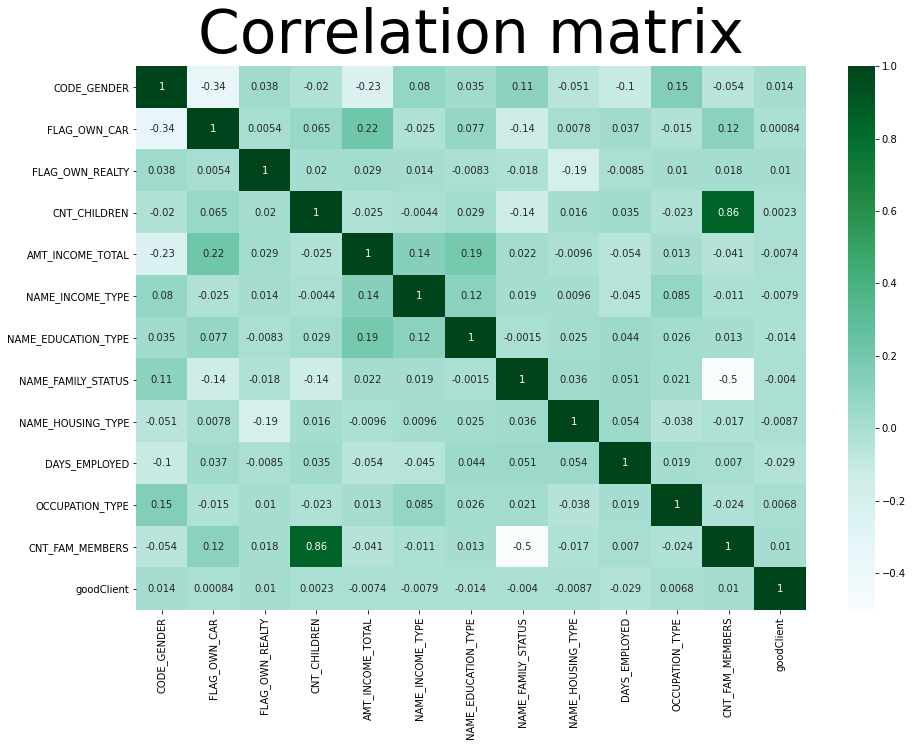

In [50]:
# Graficar la matriz
import seaborn as sns

plt.figure(figsize=(15,10)) 
sns.heatmap(correlation_matrix, annot = True,cmap='BuGn') # Link para los colores https://seaborn.pydata.org/tutorial/color_palettes.html
plt.title("Correlation matrix",fontdict= {'fontsize':60})
plt.savefig("correlation-matriz-datSet.png")
plt.show()

## ***Splitting Data***

In [37]:
# Se separa el atributo objetivo(target) en "y" y los demas atributos en "X"
X = dataSet.drop(['goodClient','STATUS'],axis=1)
y = dataSet['goodClient']

In [38]:
# Splitting Data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 123)

# **Algoritmos de Clasificación**

---



# **Árbol de decisión**

In [39]:
#clf = DecisionTreeClassifier(criterion="entropy")
clf = DecisionTreeClassifier(criterion="gini")
# Entrenar Decision Tree Classifer
clf = clf.fit(X_train,y_train)

# Predecir la respuesta para el conjunto de datos de prueba
y_pred = clf.predict(X_test)

In [40]:
# Resultados

print("Numero de datos en test:",X_test.shape[0])
print("Numero de aciertos:",metrics.accuracy_score(y_test,y_pred,normalize=False))
print("Numero de desaciertos:",(y_test != y_pred).sum())
print("Exactitud(Accuracy):",metrics.accuracy_score(y_test,y_pred))

# Matriz de Confución
print("\n\t---Matriz de Confución Árbol de decisión---")
# print(metrics.confusion_matrix(y_test,y_pred))
VN,FP,FN,VP = metrics.confusion_matrix(y_test,y_pred).ravel()
print("VN \t FP")
print(VN," \t ",FP)
print("FN \t VP")
print(FN," \t ",VP)

Numero de datos en test: 7541
Numero de aciertos: 7468
Numero de desaciertos: 73
Exactitud(Accuracy): 0.990319586261769

	---Matriz de Confución Árbol de decisión---
VN 	 FP
21  	  37
FN 	 VP
36  	  7447


# **Gaussian Naive Bayes**

In [41]:
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)

In [42]:
# Resultados

#print("Numbero de observaciones mal etiquetadas del total de %d observaciones : %d" %(X_test.shape[0], (y_test != y_pred).sum()))
print("Numero de datos en test:",X_test.shape[0])
print("Numero de aciertos:",metrics.accuracy_score(y_test,y_pred,normalize=False))
print("Numero de desaciertos:",(y_test != y_pred).sum())
print("Exactitud(Accuracy):",metrics.accuracy_score(y_test,y_pred))

# Matriz de Confución
print("\n\t---Matriz de Confución Naive Bayes---")
# print(metrics.confusion_matrix(y_test,y_pred))
VN,FP,FN,VP = metrics.confusion_matrix(y_test,y_pred).ravel()
print("VN \t FP")
print(VN," \t ",FP)
print("FN \t VP")
print(FN," \t ",VP)

Numero de datos en test: 7541
Numero de aciertos: 7483
Numero de desaciertos: 58
Exactitud(Accuracy): 0.9923087123723644

	---Matriz de Confución Naive Bayes---
VN 	 FP
0  	  58
FN 	 VP
0  	  7483


# ***OneR***

## **Algoritmo**

In [43]:
n_samples, n_features = X.shape
attribute_means = X.mean(axis=0)
assert attribute_means.shape == (n_features,)
X_d = np.array(X >= attribute_means, dtype='int')

In [44]:
from collections import defaultdict
from operator import itemgetter

def train(X, y_true, feature):  
    # Check that variable is a valid number
    n_samples, n_features = X.shape
    assert 0 <= feature < n_features
    # Get all of the unique values that this variable has
    values = set(X[:,feature])
    # Stores the predictors array that is returned
    predictors = dict()
    errors = []
    for current_value in values:
        most_frequent_class, error = train_feature_value(X, y_true, feature, current_value)
        predictors[current_value] = most_frequent_class
        errors.append(error)
    # Compute the total error of using this feature to classify on
    total_error = sum(errors)
    return predictors, total_error
# Compute what our predictors say each sample is based on its value
#y_predicted = np.array([predictors[sample[feature]] for sample in X])
def train_feature_value(X, y_true, feature, value):
    # The four input parameters are data set, category array, selected feature index value and feature value
    # Create a simple dictionary to count how frequency they give certain predictions
    class_counts = defaultdict(int)
    # Iterate through each sample and count the frequency of each class/value pair
    for sample, y in zip(X, y_true):
        if sample[feature] == value:
            class_counts[y] += 1
    # Now get the best one by sorting (highest first) and choosing the first item
    sorted_class_counts = sorted(class_counts.items(), key=itemgetter(1), reverse=True)
    most_frequent_class = sorted_class_counts[0][0]
    # The error is the number of samples that do not classify as the most frequent class
    # *and* have the feature value.
    n_samples = X.shape[1]
    error = sum([class_count for class_value, class_count in class_counts.items()
                 if class_value != most_frequent_class])
    return most_frequent_class, error

In [45]:
# Now, we split into a training and test set
X_train, X_test, y_train, y_test = train_test_split(X_d, y, test_size = 0.3, random_state = 123)

In [46]:
# Compute all of the predictors
all_predictors = {variable: train(X_train, y_train, variable) for variable in range(X_train.shape[1])}
errors = {variable: error for variable, (mapping, error) in all_predictors.items()}
# Now choose the best and save that as "model"
# Sort by error
best_variable, best_error = sorted(errors.items(), key=itemgetter(1))[0]
#print("The best model is based on variable {0} and has error {1:.2f}".format(best_variable, best_error))

# Choose the bset model
model = {'variable': best_variable,
         'predictor': all_predictors[best_variable][0]}

def predict(X_test, model):
    variable = model['variable']
    predictor = model['predictor']
    y_pred = np.array([predictor[int(sample[variable])] for sample in X_test])
    return y_pred

y_pred = predict(X_test, model)

## **Ejecución**

In [47]:
# Compute all of the predictors
all_predictors = {variable: train(X_train, y_train, variable) for variable in range(X_train.shape[1])}
errors = {variable: error for variable, (mapping, error) in all_predictors.items()}
# Now choose the best and save that as "model"
# Sort by error
best_variable, best_error = sorted(errors.items(), key=itemgetter(1))[0]
#print("The best model is based on variable {0} and has error {1:.2f}".format(best_variable, best_error))

# Choose the bset model
model = {'variable': best_variable,
         'predictor': all_predictors[best_variable][0]}

def predict(X_test, model):
    variable = model['variable']
    predictor = model['predictor']
    y_pred = np.array([predictor[int(sample[variable])] for sample in X_test])
    return y_pred

y_pred = predict(X_test, model)

In [48]:
# Resultados

#print("Numbero de observaciones mal etiquetadas del total de %d observaciones : %d" %(X_test.shape[0], (y_test != y_pred).sum()))
print("Numero de datos en test:",X_test.shape[0])
print("Numero de aciertos:",metrics.accuracy_score(y_test,y_pred,normalize=False))
print("Numero de desaciertos:",(y_test != y_pred).sum())
print("Exactitud(Accuracy):",metrics.accuracy_score(y_test,y_pred))
print("\n\t---Matriz de Confución OneR---")
# print(metrics.confusion_matrix(y_test,y_pred))
VN,FP,FN,VP = metrics.confusion_matrix(y_test,y_pred).ravel()
print("\nVP \t FN")
print(VP," \t ",FN)
print("FP \t VN")
print(FP," \t ",VN)

Numero de datos en test: 7541
Numero de aciertos: 7483
Numero de desaciertos: 58
Exactitud(Accuracy): 0.9923087123723644

	---Matriz de Confución OneR---

VP 	 FN
7483  	  0
FP 	 VN
58  	  0
